In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [24]:
df= pd.read_csv('Rental apt_data.csv.xls')

In [25]:
df.head()

,title,location,price,area,rooms
0,Apartment Veembroederh...,1019 HD Amsterdam (Oostelijk Haven...,"€3,000 per month",146 m²,3 rooms
1,Apartment Weteringscha...,1017 RW Amsterdam (De Weteringscha...,"€2,200 per month",70 m²,3 rooms
2,Apartment Warmoesstraa...,1012 JE Amsterdam (Burgwallen-Oude...,"€2,250 per month",47 m²,2 rooms
3,Apartment Ruyschstraat...,1091 BZ Amsterdam (Oosterparkbuurt...,"€2,600 per month",80 m²,3 rooms
4,Apartment Rijnstraat ...,1078 PV Amsterdam (IJselbuurt) ...,"€2,350 per month",78 m²,3 rooms


df.shape

In [26]:
df.describe()

,title,location,price,area,rooms
count,288,288,288,288,288
unique,33,32,21,28,5
top,Apartment Nieuwezijds ...,1012 RZ Amsterdam (Burgwallen-Nieu...,"€1,950 per month",100 m²,3 rooms
freq,18,27,45,36,177


In [27]:
df.isnull().sum()

title       0
location    0
price       0
area        0
rooms       0
dtype: int64

Here we can see that there is no null or missing value in our data. 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     288 non-null    object
 1   location  288 non-null    object
 2   price     288 non-null    object
 3   area      288 non-null    object
 4   rooms     288 non-null    object
dtypes: object(5)
memory usage: 11.4+ KB


As we can see our whole data is in object form.

In [29]:
df.rooms.value_counts()

3 rooms    177
2 rooms     90
5 rooms      9
4 rooms      9
6 rooms      3
Name: rooms, dtype: int64

In [30]:
df.area.value_counts()

100 m²    36
55 m²     27
120 m²    13
89 m²      9
69 m²      9
72 m²      9
75 m²      9
40 m²      9
87 m²      9
45 m²      9
54 m²      9
60 m²      9
92 m²      9
105 m²     9
65 m²      9
41 m²      9
110 m²     9
83 m²      9
125 m²     9
57 m²      9
117 m²     9
78 m²      9
80 m²      9
47 m²      9
91 m²      9
146 m²     6
70 m²      5
155 m²     3
Name: area, dtype: int64

# Data Preprocessing.

Doing custom mapping as replacing rooms with a specific numbers just like labelencoding and one one hot encoding.

In [31]:
df['rooms'] = df['rooms'].map({'3 rooms':3, '2 rooms':2, '5 rooms':5,'4 rooms':4, '6 rooms':6})

In [32]:
df['area'] = df['area'].map({'100 m²':100*10.763,'55 m²':55*10.763,'120 m²':120*10.763, '89 m²':89*10.763, '69 m²':69*10.763, '72 m²':72*10.763, '75 m²':75*10.763, '40 m²':40*10.763, '87 m²':87*10.763, '45 m²':45*10.763, '54 m²':54*10.763, '60 m²':60*10.763, '92 m²':92*10.763, '105 m²':105*10.763, '65 m²':65*10.763, '41 m²':41*10.763, '110 m²':110*10.763, '83 m²':83*10.763, '125 m²':125*10.763, '57 m²':57*10.763, '117 m²':117*10.763, '78 m²':78*10.763, '80 m²':80*10.763, '47 m²':47*10.763, '91 m²':91*10.763, '146 m²':146*10.763, '70 m²':70*10.763, '155 m²':155*10.763})

Here i have done custom mapping to both rooms and area column, but in the area column i have converted all m² into feet.

In [33]:
df["price"] = df['price'].str.replace(' ', '').str.replace(',', '').str.replace('€', '').str.replace('permonth', '').astype(float)

In [34]:
df['price'] = df['price'].astype(int)

Here i have replaced all the symbols like( ',' , '€' ,) ..etc. and object('permonth') to float and the float to int.

In [35]:
final_df = df.iloc[:,2:5]

In [36]:
final_df

,price,area,rooms
0,3000,1571.398,3
1,2200,753.410,3
2,2250,505.861,2
3,2600,861.040,3
4,2350,839.514,3
...,...,...,...
283,1950,807.225,3
284,1950,774.936,3
285,1950,979.433,3
286,2500,1183.930,4


As we can see that this is my final data is ready on which i'm going to work.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     288 non-null    object 
 1   location  288 non-null    object 
 2   price     288 non-null    int32  
 3   area      288 non-null    float64
 4   rooms     288 non-null    int64  
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 10.2+ KB


As we can see here our data is in integer type.

In [38]:
final_df.describe()

,price,area,rooms
count,288.000000,288.000000,288.000000
mean,2311.197917,877.259243,2.812500
std,507.219694,291.244059,0.727448
min,1500.000000,430.520000,2.000000
25%,1937.500000,608.109500,2.000000
50%,2250.000000,861.040000,3.000000
75%,2775.000000,1076.300000,3.000000
max,3250.000000,1668.265000,6.000000


Here we get to know that price has the highest mean(2311.19) value and rooms has the lowest mean value(2.81).

# Exploratory Data Analysis.

In [39]:
px.scatter(final_df, x = 'rooms', y = 'area', color = 'price',marginal_x = 'box', marginal_y = 'histogram')

As we can see here rooms 3 with the area '1076.3' and rooms 6 with the area '1668.265' has the highest price 3250.

In [40]:
rooms = final_df['rooms'].value_counts()

In [41]:
rooms.index

Int64Index([3, 2, 5, 4, 6], dtype='int64')

In [42]:
rooms.values

array([177,  90,   9,   9,   3], dtype=int64)

In [43]:
px.pie(data_frame = rooms, names = rooms.index, values = rooms.values)

As we can see clearly room 3 and room 2 have been used most for rent compared to other rooms.

In [44]:
px.histogram(final_df,x = 'area')

Here we get that area from 500- 599.9 have been used most.

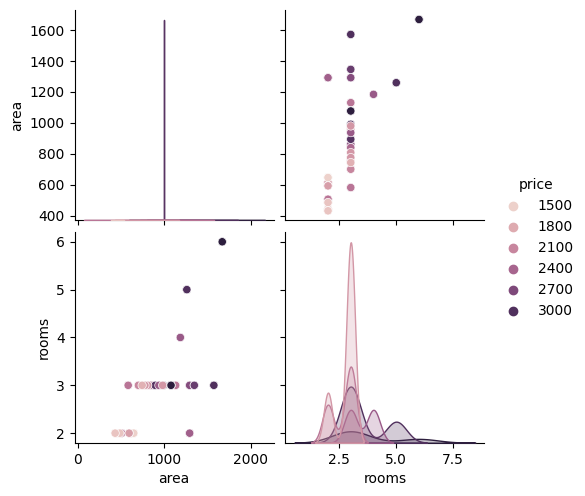

In [45]:
sns.pairplot(final_df, hue = 'price', markers = 'o')
plt.show()

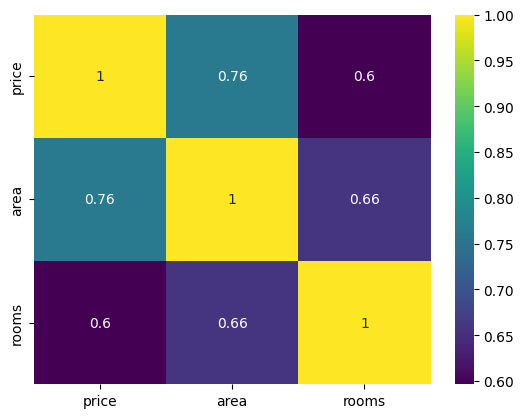

In [46]:
sns.heatmap(final_df.corr(), annot = True, cmap= 'viridis')
plt.show()

As we can here price and area are highly correlated with each other.

<AxesSubplot: xlabel='rooms', ylabel='price'>

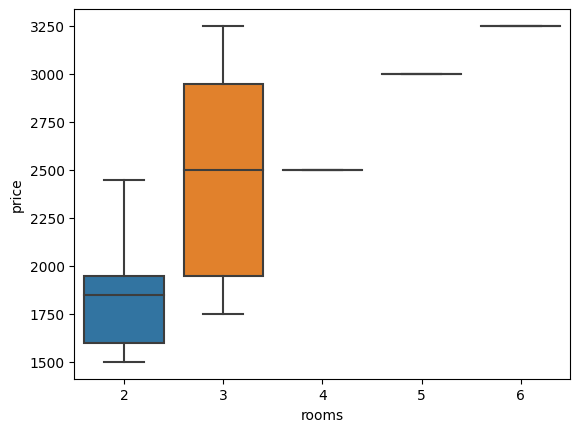

In [47]:
sns.boxplot(data=final_df, x="rooms", y="price")

Here we can that there is no outlier present in our rooms feature.

<AxesSubplot: xlabel='area', ylabel='price'>

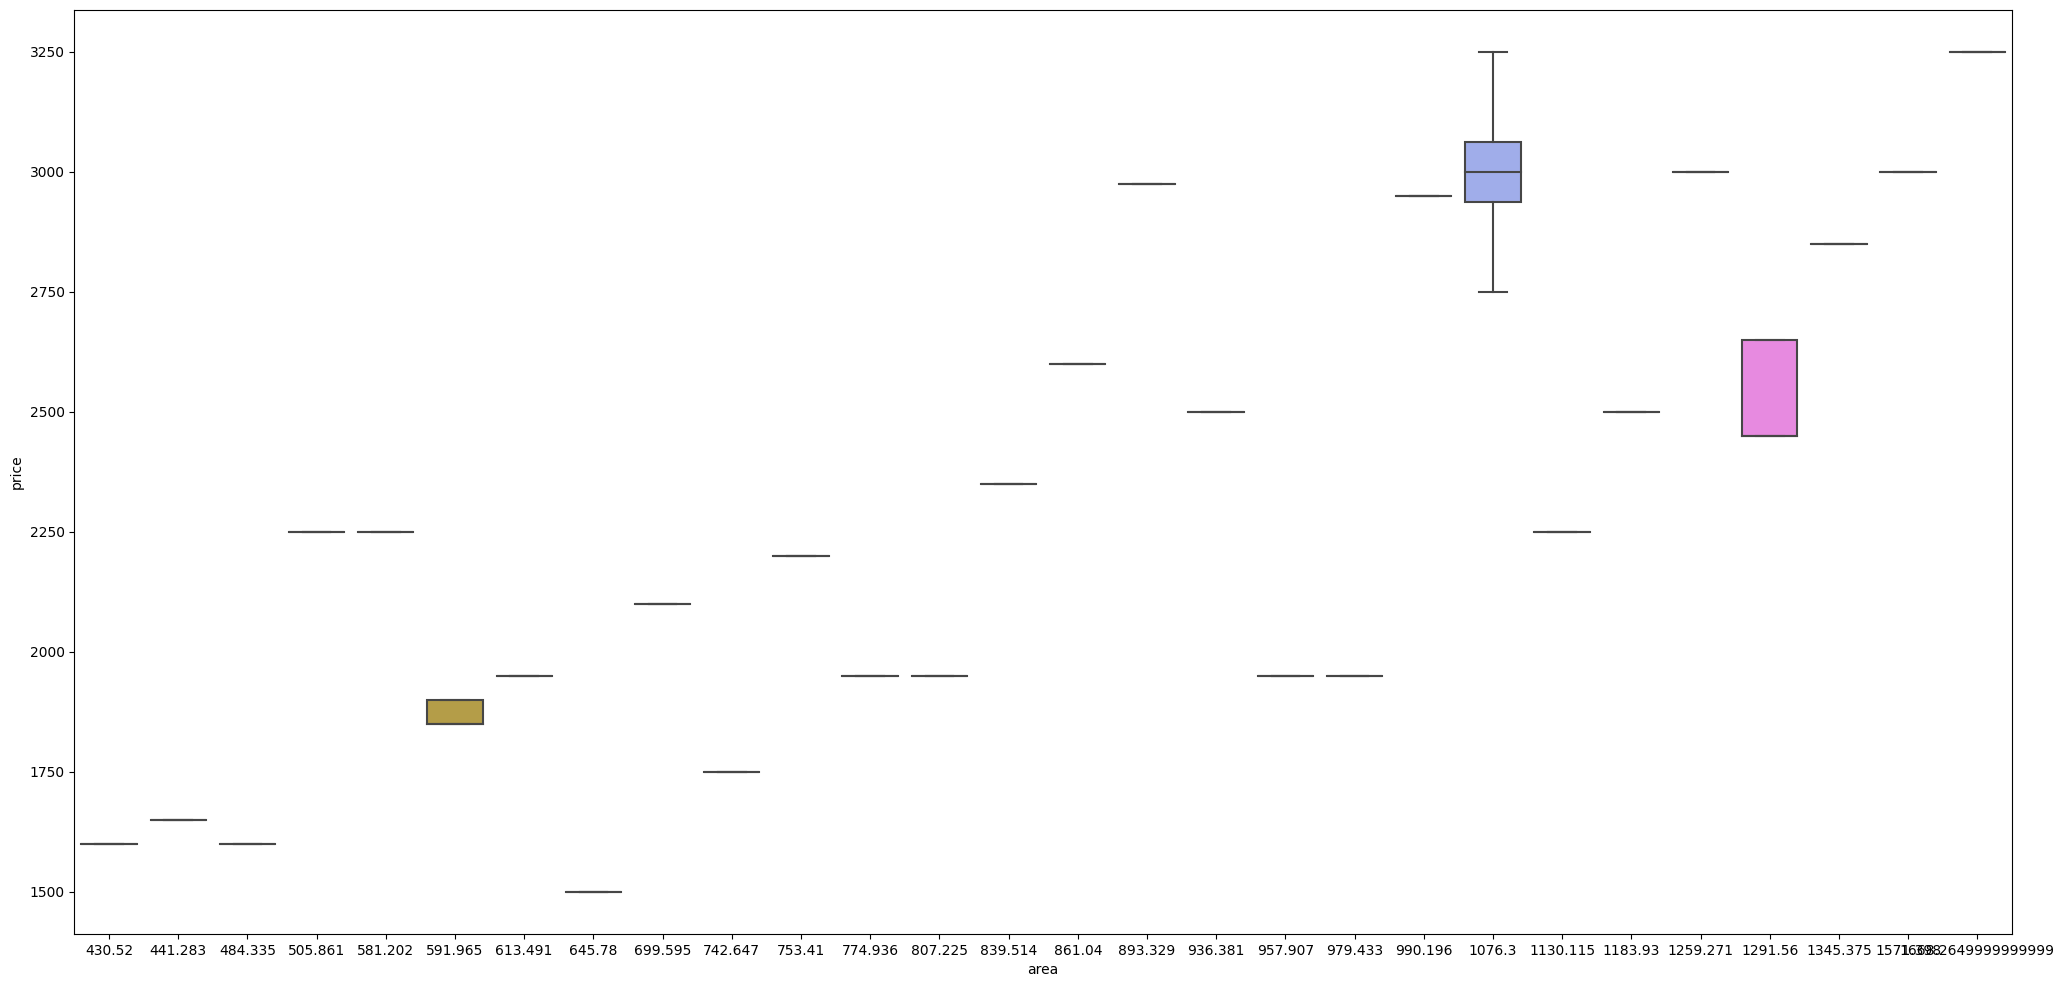

In [48]:
plt.figure(figsize = (25,12))
sns.boxplot(data=final_df, x="area", y="price")

Here we can see that there is no outlier present in area feature.

# Train test split.

In [50]:
x = final_df[['area','rooms']]
y = final_df['price']

X = x.values.reshape(-1,1)

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (288, 2)
Shape of y : (288,)


Here we are parting our output from input and storing it in different variable.

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

print("Shape of x_train :", X_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (192, 2)
Shape of x_test : (96, 2)
Shape of y_train : (192,)
Shape of y_test : (96,)


Here we are training, testing and splitting  our x an y data.

# Using Standardization.

In [66]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-1.48446132, -1.11175181],
       [ 0.33882792,  0.31129051],
       [ 2.67263815,  4.58041746],
       [-0.97394034, -1.11175181],
       [ 0.66701998,  0.31129051],
       [ 0.04710164,  0.31129051],
       [ 0.26589635,  0.31129051],
       [-0.60928249,  0.31129051],
       [-1.48446132, -1.11175181],
       [-0.06229572,  0.31129051],
       [ 1.03167783,  1.73433283],
       [ 2.34444608,  0.31129051],
       [-1.33859819, -1.11175181],
       [ 0.66701998,  0.31129051],
       [ 0.19296478,  0.31129051],
       [ 0.19296478,  0.31129051],
       [ 1.28693832,  3.15737514],
       [-0.42695356,  0.31129051],
       [-1.48446132, -1.11175181],
       [ 0.66701998,  0.31129051],
       [ 0.66701998,  0.31129051],
       [-1.33859819, -1.11175181],
       [-0.79161141, -1.11175181],
       [ 1.03167783,  1.73433283],
       [ 0.04710164,  0.31129051],
       [-0.97394034, -1.11175181],
       [-0.60928249,  0.31129051],
       [-1.01040612,  0.31129051],
       [ 0.84934891,

# KNN Algorithm

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
knn.score(X_test,y_test)*100

84.375

# KNN Hyperparameter Tuning.

In [70]:
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [71]:
for i,k in enumerate(neighbors):
         knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
train_accuracy[i] = knn.score(X_train, y_train)
test_accuracy[i] = knn.score(X_test, y_test)

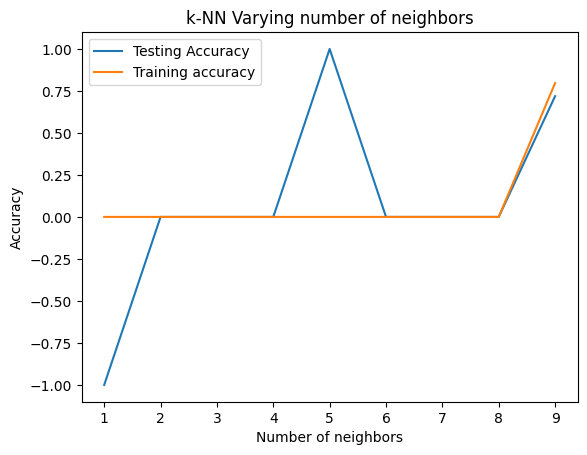

In [72]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

For k=4 and k=5 our Accuracy is 84.37 which is good.

In [73]:
knn = KNeighborsClassifier(n_neighbors=4)

In [74]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [75]:
knn.score(X_test,y_test)*100

84.375

# Linear Regression Algorithm

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [77]:
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test)*100)

59.37375317046112


# Randomforest Algorithm

In [78]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(random_state=0)

In [79]:
y_pred = (regressor.score(X_test, y_test)*100)
y_pred

98.60163026421118

From the Above Three Algorithm Random forest has given the best Accuracy of 98.60 so i will go with it.

# model deployment

In [80]:
from re import template
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle
from joblib import dump, load

In [81]:
pickle.dump(regressor,open('model.pkl','wb'))